# `MEDUSA`
aka. Dynamic-Prospective LCA aka. Union(premise, temporalis)

Notebook demonstrating the dynamic characterization possibilities of medusa

In [1]:
from bw_temporalis import easy_timedelta_distribution, TemporalDistribution, easy_datetime_distribution
import sys
import os
sys.path.append(os.path.realpath('../'))
from medusa.edge_extractor import *
from medusa.matrix_modifier import MatrixModifier
from medusa.medusa_lca import *
from medusa.timeline_builder import TimelineBuilder
from medusa.dynamic_characterization import DynamicCharacterization
import bw2data as bd
import bw2calc as bc
import numpy as np
import pandas as pd

In [2]:
from tests.databases import *
db_dynamic_cf_test()

100%|██████████| 4/4 [00:00<?, ?it/s]

Vacuuming database 
Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 2/2 [00:00<00:00, 5302.53it/s]

Vacuuming database 


Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 2/2 [00:00<?, ?it/s]


Vacuuming database 
Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 2/2 [00:00<?, ?it/s]

Vacuuming database 


In [3]:
demand = {('foreground', 'A'): 1}
gwp = ('GWP', 'example')

# Static LCA

In [4]:
slca = bc.LCA(demand, gwp)
slca.lci()
slca.lcia()
print(f'Static LCA score: {slca.score}')

Static LCA score: 6.632910037621073


# `MEDUSA` LCA

In [5]:
SKIPPABLE = [node.id for node in bd.Database('background_2020')] + [
    node.id for node in bd.Database('background_2024')
]

def filter_function(database_id: int) -> bool:
    return database_id in SKIPPABLE

Now we can do the graph traversal and create a timeline of edges:

In [6]:
import warnings
warnings.filterwarnings("ignore")

database_date_dict = {
            'background_2008': datetime.strptime("2008", "%Y"),
            'background_2024': datetime.strptime("2024", "%Y"),
            'foreground': "dynamic", # flag databases that should be temporally distributed with "dynamic"
        }

In [7]:
mlca = MedusaLCA(demand, gwp, filter_function, database_date_dict, max_calc=1000)

Starting graph traversal
Calculation count: 1


In [8]:
mlca.build_timeline()

All databases in database_date_dict exist as brightway project databases


,hash_producer,time_mapped_producer,date_producer,producer,producer_name,hash_consumer,time_mapped_consumer,date_consumer,consumer,consumer_name,amount,interpolation_weights
0,2024,1595,2024-01-01,1593,B,2024,1596,2024-01-01,1594,A,1.0,{'background_2024': 1}
1,2024,1596,2024-01-01,1594,A,2024,-1,2024-01-01,-1,-1,1.0,{'background_2024': 1}


In [9]:
mlca.build_datapackage()

In [10]:
mlca.lci()

In [11]:
mlca.lcia()

In [12]:
print('New MEDUSA LCA Score:', mlca.score)
print('Old static LCA Score:', slca.score)

New MEDUSA LCA Score: 6.632909988403321
Old static LCA Score: 6.632910037621073


In [13]:
#mlca.calculate_dynamic_lci()


In [14]:
mlca.dynamic_inventory


{'N2O': {'time': array(['2038-12-31T15:18:00'], dtype='datetime64[s]'),
  'amount': array([0.003]),
  'emitting_process': array([1595])},
 'CH4': {'time': array(['2013-12-31T13:48:00'], dtype='datetime64[s]'),
  'amount': array([0.1]),
  'emitting_process': array([1595])},
 'CO2': {'time': array(['2018-12-31T18:54:00'], dtype='datetime64[s]'),
  'amount': array([3.]),
  'emitting_process': array([1595])}}

### dynamic LCA 
Medusa allows to calculate radiative forcing [W/m2] and GWP [kg CO2eq] over fexible time horizons (TH). Default TH is 100 years.

The TH of analysis can be flexible (fixed_TH == False), which calculates the warming for the duration of TH from the timing each each emission or it can be fixed (fixed_TH), which harmonizes the duration of impact calculation to duration of TH starting from the functional unit. This means that emissions occuring later than the functional unit are counted for a shorter time (less impact) and emission occuring earlier are counted for a longer time (more impact). See more information in Levasseur 2010.

Calculate dynamic emissions for radiative forcing, flexible TH and 100 years TH (default)

the flow is not in the inventory: carbon monoxide


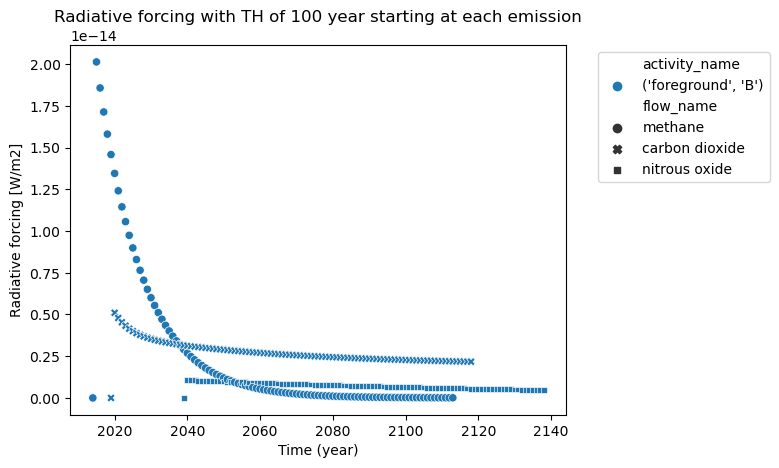

characterized dynamic score: 6.064243255898364e-13 [radiative_forcing (100 year)]


In [15]:

mlca.characterize_dynamic_lci(type="radiative_forcing", fixed_TH = False)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.characterized_dynamic_score} [{mlca.type_of_method} ({mlca.TH} {mlca.temporal_grouping})]")

In [16]:
# show characterized inventory 
mlca.characterized_inventory

,date,amount,flow,flow_name,activity,activity_name,amount_sum
100,2013-12-31 13:48:00,0.000000e+00,1586,methane,1595,"(foreground, B)",0.000000e+00
101,2014-12-31 19:37:12,2.013230e-14,1586,methane,1595,"(foreground, B)",2.013230e-14
102,2016-01-01 01:26:24,1.857247e-14,1586,methane,1595,"(foreground, B)",3.870478e-14
103,2016-12-31 07:15:36,1.713350e-14,1586,methane,1595,"(foreground, B)",5.583827e-14
104,2017-12-31 13:04:48,1.580601e-14,1586,methane,1595,"(foreground, B)",7.164428e-14
...,...,...,...,...,...,...,...
295,2133-12-31 16:12:00,4.903835e-16,1588,nitrous oxide,1595,"(foreground, B)",7.047723e-14
296,2134-12-31 22:01:12,4.863474e-16,1588,nitrous oxide,1595,"(foreground, B)",7.096358e-14
297,2136-01-01 03:50:24,4.823446e-16,1588,nitrous oxide,1595,"(foreground, B)",7.144592e-14
298,2136-12-31 09:39:36,4.783747e-16,1588,nitrous oxide,1595,"(foreground, B)",7.192430e-14


Calculate dynamic emissions for radiative forcing, fixed TH and 100 years TH (default) -> forcing is cut off at timing of FU + TH

the flow is not in the inventory: carbon monoxide


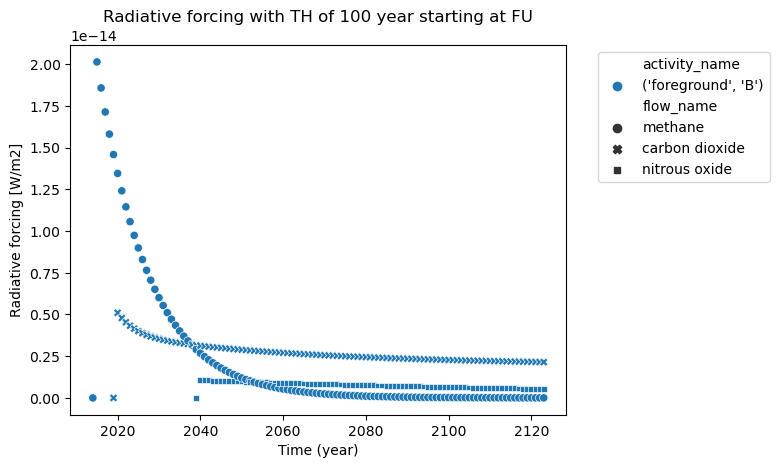

characterized dynamic score: 6.097005861693168e-13 [radiative_forcing (100)]


In [17]:
mlca.characterize_dynamic_lci(type="radiative_forcing", fixed_TH = True)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.characterized_dynamic_score} [{mlca.type_of_method} ({mlca.TH})]")


In [18]:
mlca.characterized_inventory

,date,amount,flow,flow_name,activity,activity_name,amount_sum
105,2013-12-31 13:48:00,0.000000e+00,1586,methane,1595,"(foreground, B)",0.000000e+00
106,2014-12-31 19:37:12,2.013230e-14,1586,methane,1595,"(foreground, B)",2.013230e-14
107,2016-01-01 01:26:24,1.857247e-14,1586,methane,1595,"(foreground, B)",3.870478e-14
108,2016-12-31 07:15:36,1.713350e-14,1586,methane,1595,"(foreground, B)",5.583827e-14
109,2017-12-31 13:04:48,1.580601e-14,1586,methane,1595,"(foreground, B)",7.164428e-14
...,...,...,...,...,...,...,...
103,2121-12-31 18:21:36,2.149594e-15,1585,carbon dioxide,1595,"(foreground, B)",2.828998e-13
213,2121-12-31 18:21:36,3.600413e-18,1586,methane,1595,"(foreground, B)",2.597991e-13
104,2123-01-01 00:10:48,2.144849e-15,1585,carbon dioxide,1595,"(foreground, B)",2.850446e-13
214,2123-01-01 00:10:48,3.321457e-18,1586,methane,1595,"(foreground, B)",2.598025e-13


We can also calculate dynamic emissions for GWP, flexible TH and 100 years TH (default)

the flow is not in the inventory: carbon monoxide


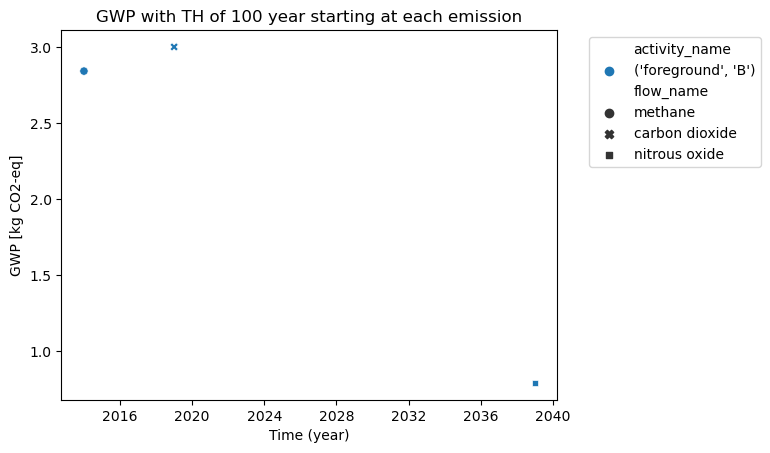

characterized dynamic score: 6.633093482398154 [GWP (100)]


In [19]:
mlca.characterize_dynamic_lci(type="GWP", fixed_TH = False, TH=100)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.characterized_dynamic_score} [{mlca.type_of_method} ({mlca.TH})]")

In [20]:
mlca.characterized_dynamic_score

6.633093482398154

With fixed TH of 100 years

the flow is not in the inventory: carbon monoxide


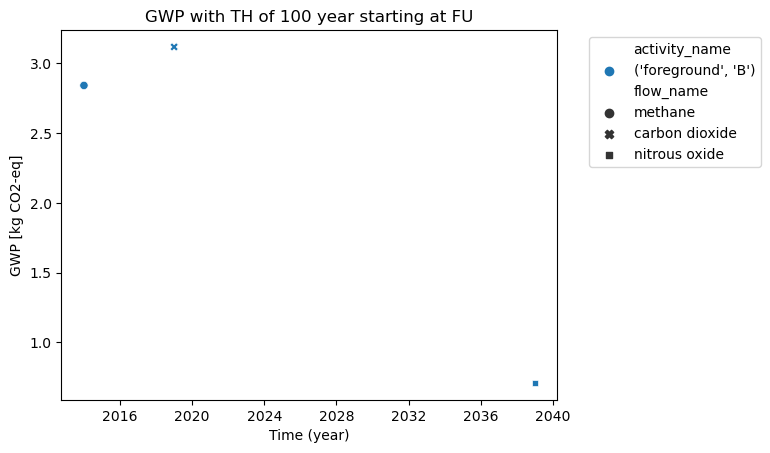

In [21]:
mlca.characterize_dynamic_lci(type="GWP", fixed_TH = True)
mlca.plot_dynamic_characterized_inventory()

In [22]:
mlca.characterized_dynamic_score

6.668929351408276

additionally, we can vary the TH: e.g. to 20 years


the flow is not in the inventory: carbon monoxide


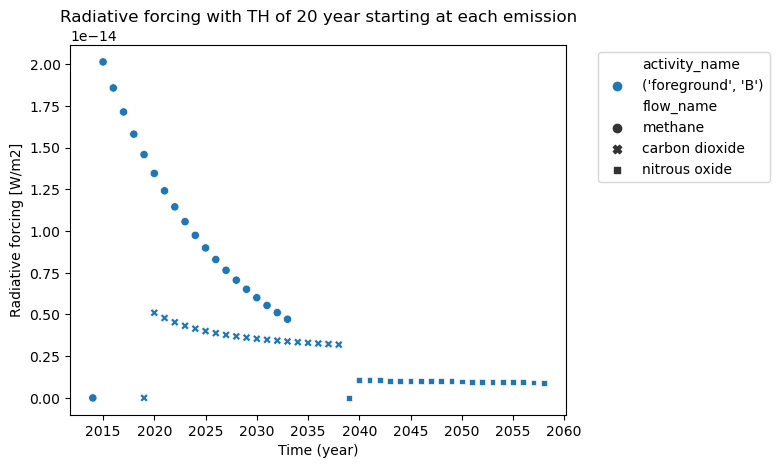

characterized dynamic score: 2.945652447642069e-13 [radiative_forcing (20)]


In [23]:
mlca.characterize_dynamic_lci(type="radiative_forcing", fixed_TH = False, TH=20)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.characterized_dynamic_score} [{mlca.type_of_method} ({mlca.TH})]")

In [24]:
mlca.dynamic_inventory_characterizer.levasseur_dcfs.keys() 
# available dynamic characterization factors for GHGs, only first 4 ones are currently used but all would be there

dict_keys(['carbon dioxide', 'methane', 'nitrous oxide', 'carbon monoxide', 'CFC-11', 'CFC-12', 'CFC-13', 'CFC-113', 'CFC-114', 'CFC-115', 'Halon-1201', 'Halon-1202', 'Halon-1211', 'Halon-1301', 'Halon-2301', 'Halon-2311', 'Halon-2401', 'Halon-2402', 'Carbon tetrachloride (CFC-10)', 'Methyl bromide (Halon 1001)', 'Methylene bromide', 'Methyl chloroform (trichloroethane)', '1,2-dichloroethane', 'Chloroform', 'HCFC-21', 'HCFC-22', 'HCFC-122', 'HCFC-122a', 'HCFC-123', 'HCFC-124', 'HCFC-132c', 'HCFC-141b', 'HCFC-142b', 'HCFC-225ca', 'HCFC-225cb', 'E-1-chloro-3,3,3-trifluoroprop-1-ene', 'HFC-23', 'HFC-32', 'HFC-41', 'HFC-125', 'HFC-134', 'HFC-134a', 'HFC-143', 'HFC-143a', 'HFC-152', 'HFC-152a', 'HFC-161', 'HFC-227ca', 'HFC-227ea', 'HFC-236cb', 'HFC-236ea', 'HFC-236fa (HCFC-236fa)', 'HFC-245ca', 'HFC-245cb', 'HFC-245ea', 'HFC-245eb', 'HFC-245fa', 'HFC-272ca', 'HFC-365mfc', 'HFC-43-10mee', 'HFC-1132a', 'HFC-1141', 'Z-HFC-1225ye', 'E-HFC-1225ye', 'Z-HFC-1234ze', 'HFC-1234yf', 'E-HFC-1234ze', '

In [25]:
from bw_temporalis.lcia import characterize_co2

In [26]:
characterize_co2()

TypeError: characterize_co2() missing 1 required positional argument: 'series'